In [1]:
#-*- coding:utf-8 -*-

In [2]:
import graphlab
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
data = graphlab.SFrame.read_csv('Sogou50W_ltp_labeled.csv')

This non-commercial license of GraphLab Create is assigned to guoxiuhe@nefu.edu.cn and will expire on April 02, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-05-28 21:33:26,385 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\heguoxiu\AppData\Local\Temp\graphlab_server_1464442396.log.0


Unable to parse line "07:20:05,9535388990622586,鍦ｇ伀浼犻�璺�嚎,3 1,zhidao.baidu"

1 lines failed to parse correctly

Finished parsing file E:\Python\2Graduation-Project\Sogou50W_ltp_labeled.csv

Parsing completed. Parsed 100 lines in 0.686401 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,str,str,str,list,long,long,str,str,str,long,long,long,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to parse line "07:20:05,9535388990622586,鍦ｇ伀浼犻�璺�嚎,3 1,zhidao.baidu"

1 lines failed to parse correctly

Finished parsing file E:\Python\2Graduation-Project\Sogou50W_ltp_labeled.csv

Parsing completed. Parsed 46756 lines in 0.284404 secs.

In [5]:
data

﻿time,user_id,query,result_click,url,result_and_click,result_rank
00:00:00,3933365481995287,最佳受孕时间,6 3,ks.cn.yahoo.com/question/1407051001276.html ...,"[6, 3]",6
00:00:00,8248403977107859,pdf,1 1,download.it168.com/18/1805/13947/13947_3.shtml ...,"[1, 1]",1
00:00:00,6551182914925117,尼康相机报价,6 4,product.it168.com/list/b/03050171_1.shtml ...,"[6, 4]",6
00:00:00,6478452674857782,1000,4 1,www.1000dy.cn,"[4, 1]",4
00:00:00,23457845712802688,人妖,4 1,play.zol.com.cn/detail/1659_1.html ...,"[4, 1]",4
00:00:00,4625224675315291,印尼排华是怎么回��� ...,2 6,zhidao.baidu.com/question/47218514 ...,"[2, 6]",2
00:00:00,5750662932822584,女士找鸭子经历,3 2,zhangxiaoyu52.blog.sohu.com/76119569.html ...,"[3, 2]",3
00:00:01,8761939261737872,年轻人住房问题,11 7,news.qq.com/a/20070810/002446.htm ...,"[11, 7]",11
00:00:01,866575159856572,印尼排华是怎么回��� ...,8 2,wenwen.soso.com/z/q38846748.htm ...,"[8, 2]",8
00:00:01,5388089767668996,免费看三级图片,9 7,226500.cn/bbs/dispbbs.asp?boardid=46&Id=9621&s ...,"[9, 7]",9


In [6]:
data['word_count'] = graphlab.text_analytics.count_words(data['words'])
data['pos_count'] = graphlab.text_analytics.count_words(data['poses'])
data['parser_count'] = graphlab.text_analytics.count_words(data['parsers'])
data['word_tfidf'] = graphlab.text_analytics.tf_idf(data['word_count'])
data['pos_tfidf'] = graphlab.text_analytics.tf_idf(data['pos_count'])
data['parser_tfidf'] = graphlab.text_analytics.tf_idf(data['parser_count'])

In [7]:
features1 = ['word_tfidf', 'pos_tfidf', 'parser_tfidf', 'len_words', 'len_seg', 'result_rank', 'click_rank']
features2 = ['word_tfidf', 'pos_tfidf', 'len_words', 'len_seg', 'result_rank', 'click_rank']

In [8]:
features3 = ['word_tfidf']

In [9]:
train_data, test_data = data.random_split(.8, seed=0)
train_data, validation_data = train_data.random_split(0.75, seed=0)

In [10]:
boosted_tree = graphlab.boosted_trees_classifier.create(train_data, target='label', features=features1, \
                                                        validation_set=validation_data, max_depth=20,\
                                                        max_iterations=500, min_child_weight=0.1, \
                                                        step_size=0.3, min_loss_reduction=0)

WARNING: Detected extremely low variance for feature(s) 'parser_tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 28020

Number of classes           : 3

Number of feature columns   : 7

Number of unpacked features : 13956

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.497606     | 0.786296          | 0.912487          | 0.728381            | 0.936353            |

| 2         | 0.936812     | 0.788365          | 0.791446          | 0.731772            | 0.839883            |

| 3         | 1.339818     | 0.790757          | 0.713184          | 0.733044            | 0.779486            |

| 4         | 1.829229     | 0.797502          | 0.650734          | 0.735163            | 0.737133            |

| 5         | 2.240632     | 0.803712          | 0.602114          | 0.735163            | 0.706959            |

| 6         | 2.674635     | 0.810707          | 0.562447          | 0.737707            | 0.684971            |

| 10        | 4.107639     | 0.825946          | 0.475078          | 0.739826            | 0.645785            |

| 11        | 4.441443     | 0.828837          | 0.461087          | 0.739508            | 0.639483            |

| 15        | 5.666047     | 0.835261          | 0.432833          | 0.739190            | 0.628890            |

| 20        | 7.032052     | 0.841292          | 0.416846          | 0.739508            | 0.624204            |

| 25        | 8.277855     | 0.846003          | 0.408277          | 0.739826            | 0.622354            |

| 30        | 9.536061     | 0.850428          | 0.399671          | 0.740568            | 0.620219            |

| 35        | 10.775265    | 0.853248          | 0.394415          | 0.740886            | 0.619335            |

| 40        | 12.062270    | 0.856495          | 0.388543          | 0.740250            | 0.618863            |

| 45        | 13.327294    | 0.859743          | 0.382574          | 0.740568            | 0.617453            |

| 50        | 14.548364    | 0.862313          | 0.377534          | 0.739826            | 0.617395            |

| 51        | 14.796378    | 0.862598          | 0.376749          | 0.739932            | 0.617285            |

| 55        | 15.723431    | 0.864954          | 0.373744          | 0.739614            | 0.617241            |

| 60        | 16.918646    | 0.867844          | 0.368744          | 0.740144            | 0.616438            |

| 65        | 18.071251    | 0.870021          | 0.365452          | 0.739932            | 0.616188            |

| 70        | 19.230455    | 0.872413          | 0.362280          | 0.740462            | 0.615724            |

| 75        | 20.432859    | 0.874126          | 0.358351          | 0.740568            | 0.615523            |

| 80        | 21.616065    | 0.875910          | 0.355508          | 0.740568            | 0.615521            |

| 85        | 22.798468    | 0.878016          | 0.352670          | 0.740462            | 0.615456            |

| 90        | 24.029677    | 0.879408          | 0.350184          | 0.740250            | 0.615053            |

| 95        | 25.317888    | 0.880300          | 0.347216          | 0.740674            | 0.614809            |

| 100       | 27.154584    | 0.881299          | 0.344892          | 0.740674            | 0.614798            |

| 101       | 27.410184    | 0.881299          | 0.344564          | 0.740356            | 0.614864            |

| 105       | 28.555987    | 0.882905          | 0.341612          | 0.739720            | 0.614205            |

| 110       | 30.109420    | 0.884404          | 0.339000          | 0.739614            | 0.614245            |

| 115       | 31.689463    | 0.885475          | 0.336821          | 0.739190            | 0.614222            |

| 120       | 33.362317    | 0.886188          | 0.334593          | 0.739190            | 0.613969            |

| 125       | 35.343612    | 0.887188          | 0.332461          | 0.739614            | 0.613870            |

| 130       | 37.218706    | 0.888365          | 0.328887          | 0.739614            | 0.613685            |

| 135       | 38.712351    | 0.889151          | 0.326960          | 0.739190            | 0.613802            |

| 140       | 40.704465    | 0.889686          | 0.325211          | 0.739402            | 0.613429            |

| 145       | 42.447328    | 0.890257          | 0.323154          | 0.739508            | 0.613416            |

| 150       | 43.808337    | 0.891149          | 0.321010          | 0.739084            | 0.613593            |

| 155       | 45.187743    | 0.892148          | 0.319078          | 0.739190            | 0.613608            |

| 160       | 46.594948    | 0.893005          | 0.316930          | 0.739190            | 0.613849            |

| 165       | 48.048953    | 0.893754          | 0.314985          | 0.739190            | 0.613739            |

| 170       | 49.611961    | 0.894468          | 0.313378          | 0.738872            | 0.613457            |

| 175       | 50.956766    | 0.895253          | 0.311499          | 0.738872            | 0.613404            |

| 180       | 52.314572    | 0.896395          | 0.309326          | 0.738660            | 0.613962            |

| 185       | 53.530175    | 0.896966          | 0.307429          | 0.739190            | 0.613958            |

| 190       | 54.700402    | 0.897609          | 0.305986          | 0.738978            | 0.614008            |

| 195       | 55.878469    | 0.898679          | 0.303903          | 0.738660            | 0.614400            |

| 200       | 57.033505    | 0.899286          | 0.302659          | 0.739190            | 0.614397            |

| 205       | 58.286309    | 0.900000          | 0.300763          | 0.738554            | 0.614345            |

| 210       | 59.703515    | 0.900642          | 0.298746          | 0.738237            | 0.614260            |

| 215       | 61.062519    | 0.901499          | 0.297290          | 0.738766            | 0.614434            |

| 220       | 62.777725    | 0.902141          | 0.295325          | 0.738660            | 0.614187            |

| 225       | 64.520333    | 0.903212          | 0.293991          | 0.738660            | 0.614382            |

| 230       | 65.960544    | 0.904461          | 0.292730          | 0.738766            | 0.614544            |

| 235       | 67.414157    | 0.905603          | 0.290884          | 0.738554            | 0.614744            |

| 240       | 68.833561    | 0.907138          | 0.289100          | 0.738660            | 0.614916            |

| 245       | 70.180565    | 0.908815          | 0.287562          | 0.739084            | 0.614952            |

| 250       | 71.535569    | 0.910564          | 0.285829          | 0.739614            | 0.615284            |

| 255       | 72.878572    | 0.911813          | 0.284348          | 0.739296            | 0.615355            |

| 260       | 74.233576    | 0.912919          | 0.283116          | 0.739614            | 0.615448            |

| 265       | 75.591580    | 0.914204          | 0.281439          | 0.739296            | 0.615529            |

| 270       | 76.934385    | 0.915096          | 0.279849          | 0.739402            | 0.615817            |

| 275       | 78.288389    | 0.915632          | 0.278456          | 0.739508            | 0.616087            |

| 280       | 79.537594    | 0.916560          | 0.276657          | 0.739402            | 0.616703            |

| 285       | 80.825599    | 0.917273          | 0.275581          | 0.738978            | 0.616820            |

| 290       | 82.116603    | 0.918308          | 0.273468          | 0.738978            | 0.617283            |

| 295       | 83.282006    | 0.919308          | 0.271902          | 0.738554            | 0.617564            |

| 300       | 84.501209    | 0.920093          | 0.270597          | 0.738449            | 0.617687            |

| 305       | 85.646011    | 0.920949          | 0.269257          | 0.739190            | 0.617924            |

| 310       | 86.864016    | 0.921520          | 0.268092          | 0.739402            | 0.617907            |

| 315       | 88.040820    | 0.922377          | 0.266745          | 0.739402            | 0.617910            |

| 320       | 89.229224    | 0.923626          | 0.264959          | 0.738978            | 0.618145            |

| 325       | 90.467830    | 0.924340          | 0.263687          | 0.738449            | 0.618392            |

| 330       | 91.612033    | 0.925125          | 0.262555          | 0.738872            | 0.618696            |

| 335       | 92.750636    | 0.925517          | 0.261566          | 0.738766            | 0.618855            |

| 340       | 93.905840    | 0.926767          | 0.260327          | 0.738660            | 0.619201            |

| 345       | 95.047444    | 0.927373          | 0.258861          | 0.738872            | 0.619458            |

| 350       | 96.226080    | 0.928194          | 0.257739          | 0.738766            | 0.619480            |

| 355       | 97.541156    | 0.928729          | 0.256791          | 0.738343            | 0.619770            |

| 360       | 98.850230    | 0.929979          | 0.255437          | 0.737707            | 0.620262            |

| 365       | 100.492311   | 0.931156          | 0.253858          | 0.737707            | 0.620858            |

| 370       | 101.791916   | 0.933226          | 0.252104          | 0.737813            | 0.621367            |

| 375       | 102.988721   | 0.933869          | 0.251205          | 0.737707            | 0.621400            |

| 380       | 104.364325   | 0.934904          | 0.250083          | 0.738554            | 0.621651            |

| 385       | 105.709531   | 0.936081          | 0.248746          | 0.738554            | 0.621847            |

| 390       | 106.892935   | 0.937009          | 0.247587          | 0.738978            | 0.621975            |

| 395       | 108.254340   | 0.938258          | 0.246295          | 0.738343            | 0.622291            |

| 400       | 109.676745   | 0.939829          | 0.244002          | 0.738766            | 0.622834            |

| 405       | 111.209750   | 0.941756          | 0.243220          | 0.738766            | 0.622941            |

| 410       | 112.577953   | 0.944111          | 0.240932          | 0.738978            | 0.623443            |

| 415       | 113.733558   | 0.946324          | 0.239950          | 0.739190            | 0.623848            |

| 420       | 114.903961   | 0.948037          | 0.238839          | 0.739190            | 0.624046            |

| 425       | 116.360565   | 0.949607          | 0.237735          | 0.739614            | 0.624419            |

| 430       | 117.602369   | 0.951035          | 0.236508          | 0.739720            | 0.624518            |

| 435       | 118.776173   | 0.952248          | 0.234968          | 0.739932            | 0.625150            |

| 440       | 119.949977   | 0.953105          | 0.233966          | 0.739508            | 0.625153            |

| 445       | 121.110780   | 0.953783          | 0.232937          | 0.739720            | 0.625384            |

| 450       | 122.232185   | 0.954675          | 0.231617          | 0.739720            | 0.625850            |

| 455       | 123.403389   | 0.955318          | 0.230108          | 0.740038            | 0.626388            |

| 460       | 124.574792   | 0.955389          | 0.229343          | 0.739932            | 0.626659            |

| 465       | 125.748196   | 0.955675          | 0.228420          | 0.739826            | 0.627006            |

| 470       | 126.937000   | 0.956031          | 0.227304          | 0.739720            | 0.627322            |

| 475       | 128.101205   | 0.956174          | 0.226517          | 0.740038            | 0.627478            |

| 480       | 129.223208   | 0.956353          | 0.225646          | 0.740038            | 0.627534            |

| 485       | 130.359213   | 0.956745          | 0.224696          | 0.740144            | 0.627964            |

| 490       | 131.515417   | 0.957352          | 0.222685          | 0.739402            | 0.628691            |

| 495       | 132.672621   | 0.957994          | 0.221427          | 0.739932            | 0.629036            |

| 500       | 133.812224   | 0.957994          | 0.220762          | 0.739932            | 0.629150            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [11]:
boosted_tree1 = graphlab.boosted_trees_classifier.create(train_data, target='label', features=features2, \
                                                        validation_set=validation_data, max_depth=20,\
                                                        max_iterations=500, min_child_weight=0.1, \
                                                        step_size=0.3, min_loss_reduction=0)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 28020

Number of classes           : 3

Number of feature columns   : 6

Number of unpacked features : 13942

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.415610     | 0.782834          | 0.914413          | 0.726897            | 0.937291            |

| 2         | 0.815016     | 0.785332          | 0.795687          | 0.730288            | 0.841404            |

| 3         | 1.223022     | 0.789079          | 0.714785          | 0.732514            | 0.779620            |

| 4         | 1.703239     | 0.797288          | 0.652768          | 0.735587            | 0.736833            |

| 5         | 2.252271     | 0.802355          | 0.606234          | 0.734633            | 0.707713            |

| 6         | 2.716690     | 0.807637          | 0.569778          | 0.735057            | 0.687786            |

| 10        | 4.363542     | 0.825196          | 0.478283          | 0.736329            | 0.645870            |

| 11        | 4.688957     | 0.827373          | 0.466204          | 0.736753            | 0.641558            |

| 15        | 5.906992     | 0.835225          | 0.436711          | 0.738449            | 0.630950            |

| 20        | 7.163409     | 0.840435          | 0.421994          | 0.738660            | 0.625570            |

| 25        | 8.627255     | 0.845646          | 0.411309          | 0.738766            | 0.622538            |

| 30        | 9.861080     | 0.849215          | 0.404905          | 0.738660            | 0.621381            |

| 35        | 11.106919    | 0.852106          | 0.398720          | 0.738025            | 0.620045            |

| 40        | 12.256540    | 0.855032          | 0.392880          | 0.738978            | 0.618780            |

| 45        | 13.369160    | 0.858137          | 0.388407          | 0.739296            | 0.617941            |

| 50        | 14.436971    | 0.860921          | 0.383357          | 0.739190            | 0.617400            |

| 51        | 14.682575    | 0.861456          | 0.382661          | 0.739508            | 0.617119            |

| 55        | 15.528382    | 0.863526          | 0.379408          | 0.739296            | 0.616796            |

| 60        | 16.652597    | 0.865632          | 0.375453          | 0.739296            | 0.616134            |

| 65        | 17.758410    | 0.867380          | 0.372271          | 0.739932            | 0.616065            |

| 70        | 18.864628    | 0.869522          | 0.368380          | 0.740568            | 0.615403            |

| 75        | 19.984248    | 0.871699          | 0.365084          | 0.740674            | 0.615377            |

| 80        | 21.038252    | 0.873733          | 0.362255          | 0.740674            | 0.615172            |

| 85        | 22.337719    | 0.875803          | 0.359147          | 0.740356            | 0.615175            |

| 90        | 23.900808    | 0.877659          | 0.356647          | 0.740780            | 0.614915            |

| 95        | 25.519091    | 0.879515          | 0.353371          | 0.740568            | 0.615003            |

| 100       | 27.232783    | 0.880657          | 0.350414          | 0.740886            | 0.614753            |

| 101       | 27.514787    | 0.880978          | 0.349868          | 0.740992            | 0.614624            |

| 105       | 28.718036    | 0.881763          | 0.348166          | 0.741204            | 0.614703            |

| 110       | 30.061087    | 0.882798          | 0.345480          | 0.741946            | 0.614365            |

| 115       | 31.262514    | 0.884368          | 0.342672          | 0.741734            | 0.614288            |

| 120       | 32.401553    | 0.885082          | 0.340732          | 0.741098            | 0.613958            |

| 125       | 33.656788    | 0.886117          | 0.337514          | 0.741204            | 0.613337            |

| 130       | 35.279674    | 0.887295          | 0.334252          | 0.741522            | 0.613375            |

| 135       | 36.861355    | 0.888330          | 0.332195          | 0.741416            | 0.613305            |

| 140       | 38.029978    | 0.889044          | 0.330471          | 0.741204            | 0.613487            |

| 145       | 39.222611    | 0.889186          | 0.328804          | 0.741310            | 0.613266            |

| 150       | 40.389837    | 0.889793          | 0.327224          | 0.741204            | 0.613386            |

| 155       | 41.491861    | 0.890685          | 0.325226          | 0.740992            | 0.613159            |

| 160       | 42.610476    | 0.891363          | 0.323306          | 0.740992            | 0.613190            |

| 165       | 43.686891    | 0.892256          | 0.321169          | 0.740462            | 0.613469            |

| 170       | 44.824904    | 0.892969          | 0.318527          | 0.740144            | 0.613219            |

| 175       | 45.930325    | 0.893647          | 0.316339          | 0.739190            | 0.613320            |

| 180       | 47.029741    | 0.894325          | 0.314349          | 0.738872            | 0.613549            |

| 185       | 48.138163    | 0.894861          | 0.312871          | 0.738449            | 0.613619            |

| 190       | 49.230781    | 0.895325          | 0.311173          | 0.737919            | 0.613657            |

| 195       | 50.321602    | 0.896181          | 0.309716          | 0.738025            | 0.613615            |

| 200       | 51.444222    | 0.897323          | 0.307845          | 0.737813            | 0.613758            |

| 205       | 52.597443    | 0.898108          | 0.306296          | 0.737919            | 0.613765            |

| 210       | 53.708670    | 0.898787          | 0.304869          | 0.737707            | 0.613740            |

| 215       | 54.848895    | 0.899500          | 0.303466          | 0.738025            | 0.613686            |

| 220       | 55.915706    | 0.900321          | 0.301858          | 0.737919            | 0.613676            |

| 225       | 56.984116    | 0.901035          | 0.300379          | 0.737601            | 0.613447            |

| 230       | 58.101330    | 0.901784          | 0.299048          | 0.737813            | 0.613629            |

| 235       | 59.198548    | 0.902677          | 0.297183          | 0.737919            | 0.613926            |

| 240       | 60.271165    | 0.903462          | 0.295610          | 0.738025            | 0.614066            |

| 245       | 61.385979    | 0.904854          | 0.294122          | 0.738237            | 0.614209            |

| 250       | 62.514198    | 0.905639          | 0.292716          | 0.738025            | 0.614523            |

| 255       | 63.622257    | 0.906852          | 0.291380          | 0.738343            | 0.614536            |

| 260       | 64.734321    | 0.908922          | 0.289127          | 0.738660            | 0.614788            |

| 265       | 65.856385    | 0.910742          | 0.287180          | 0.738449            | 0.615013            |

| 270       | 66.978449    | 0.911991          | 0.285094          | 0.739084            | 0.615430            |

| 275       | 68.122515    | 0.913062          | 0.283534          | 0.739508            | 0.615543            |

| 280       | 69.194576    | 0.914133          | 0.282459          | 0.739402            | 0.615673            |

| 285       | 70.264637    | 0.914882          | 0.281275          | 0.739932            | 0.615928            |

| 290       | 71.335699    | 0.915882          | 0.279721          | 0.740038            | 0.616315            |

| 295       | 72.452763    | 0.916702          | 0.277638          | 0.740250            | 0.616466            |

| 300       | 73.535824    | 0.917595          | 0.276345          | 0.740038            | 0.616800            |

| 305       | 74.605886    | 0.918308          | 0.275052          | 0.740038            | 0.617030            |

| 310       | 75.658946    | 0.919093          | 0.273298          | 0.739932            | 0.617229            |

| 315       | 76.739008    | 0.920021          | 0.272073          | 0.739932            | 0.617446            |

| 320       | 77.852071    | 0.920735          | 0.270976          | 0.739720            | 0.617523            |

| 325       | 78.960135    | 0.921235          | 0.269485          | 0.740144            | 0.617771            |

| 330       | 80.042197    | 0.921842          | 0.268485          | 0.739826            | 0.617947            |

| 335       | 81.165261    | 0.923305          | 0.266835          | 0.740250            | 0.618459            |

| 340       | 82.248323    | 0.923983          | 0.265709          | 0.740144            | 0.618503            |

| 345       | 83.399389    | 0.925054          | 0.264102          | 0.739932            | 0.618754            |

| 350       | 84.457449    | 0.925696          | 0.262760          | 0.740462            | 0.618860            |

| 355       | 85.480508    | 0.926445          | 0.261679          | 0.739720            | 0.619065            |

| 360       | 86.545569    | 0.927480          | 0.259695          | 0.739296            | 0.619621            |

| 365       | 87.631631    | 0.928694          | 0.257840          | 0.739932            | 0.620062            |

| 370       | 88.920704    | 0.929372          | 0.256576          | 0.740038            | 0.620443            |

| 375       | 90.131774    | 0.930050          | 0.255210          | 0.739190            | 0.620883            |

| 380       | 91.208835    | 0.930906          | 0.254321          | 0.738978            | 0.621040            |

| 385       | 92.365901    | 0.931620          | 0.253343          | 0.738660            | 0.621055            |

| 390       | 93.488966    | 0.932548          | 0.252195          | 0.738343            | 0.621138            |

| 395       | 94.721200    | 0.933833          | 0.250890          | 0.739084            | 0.621283            |

| 400       | 95.800003    | 0.934868          | 0.249954          | 0.738660            | 0.621380            |

| 405       | 97.028607    | 0.936403          | 0.248640          | 0.738766            | 0.621819            |

| 410       | 98.267812    | 0.937830          | 0.247419          | 0.738554            | 0.622412            |

| 415       | 99.414416    | 0.939864          | 0.246585          | 0.738660            | 0.622767            |

| 420       | 100.664621   | 0.941649          | 0.245537          | 0.738660            | 0.622993            |

| 425       | 101.843425   | 0.943041          | 0.244524          | 0.738343            | 0.623264            |

| 430       | 102.953829   | 0.944861          | 0.243583          | 0.738237            | 0.623518            |

| 435       | 104.123637   | 0.946146          | 0.242339          | 0.737813            | 0.624012            |

| 440       | 105.340707   | 0.948001          | 0.241127          | 0.738131            | 0.624193            |

| 445       | 106.380766   | 0.950000          | 0.240230          | 0.738025            | 0.624302            |

| 450       | 107.421826   | 0.951285          | 0.239321          | 0.738025            | 0.624436            |

| 455       | 108.460885   | 0.952391          | 0.238078          | 0.737813            | 0.624686            |

| 460       | 109.490513   | 0.952891          | 0.237222          | 0.737919            | 0.624821            |

| 465       | 110.533917   | 0.953462          | 0.235846          | 0.737919            | 0.625213            |

| 470       | 111.604521   | 0.953890          | 0.234344          | 0.738131            | 0.625734            |

| 475       | 112.662125   | 0.954533          | 0.232785          | 0.737919            | 0.626441            |

| 480       | 113.718129   | 0.954675          | 0.231751          | 0.737707            | 0.626825            |

| 485       | 114.897933   | 0.954818          | 0.230782          | 0.737813            | 0.627302            |

| 490       | 116.089337   | 0.955211          | 0.229651          | 0.737601            | 0.627483            |

| 495       | 117.307342   | 0.955460          | 0.228563          | 0.737919            | 0.628139            |

| 500       | 118.656747   | 0.955532          | 0.227727          | 0.738343            | 0.628429            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [12]:
boosted_tree2 = graphlab.boosted_trees_classifier.create(train_data, target='label', features=features3, \
                                                        validation_set=validation_data, max_depth=20,\
                                                        max_iterations=500, min_child_weight=0.1, \
                                                        step_size=0.3, min_loss_reduction=0)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 28020

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 13911

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.293413     | 0.696360          | 0.975408          | 0.688639            | 0.978171            |

| 2         | 0.521017     | 0.694218          | 0.902203          | 0.687050            | 0.908013            |

| 3         | 0.770621     | 0.693969          | 0.854905          | 0.687368            | 0.863271            |

| 4         | 0.991026     | 0.693969          | 0.823099          | 0.688851            | 0.834093            |

| 5         | 1.209832     | 0.696110          | 0.801117          | 0.688533            | 0.815811            |

| 6         | 1.425836     | 0.699465          | 0.785217          | 0.691819            | 0.802531            |

| 10        | 2.127440     | 0.700928          | 0.749425          | 0.692666            | 0.775322            |

| 11        | 2.333844     | 0.701106          | 0.742711          | 0.692984            | 0.770465            |

| 15        | 3.034850     | 0.706924          | 0.724986          | 0.695634            | 0.759398            |

| 20        | 4.127856     | 0.710136          | 0.709165          | 0.695316            | 0.750588            |

| 25        | 5.191063     | 0.713455          | 0.697469          | 0.697435            | 0.744713            |

| 30        | 6.136272     | 0.717131          | 0.686084          | 0.697117            | 0.739301            |

| 35        | 6.992877     | 0.720842          | 0.676974          | 0.698813            | 0.735258            |

| 40        | 8.037484     | 0.724054          | 0.668526          | 0.699237            | 0.732161            |

| 45        | 9.124693     | 0.725518          | 0.662126          | 0.699131            | 0.729365            |

| 50        | 10.245300    | 0.728837          | 0.654257          | 0.699873            | 0.726129            |

| 51        | 10.508707    | 0.729872          | 0.652998          | 0.700509            | 0.725915            |

| 55        | 11.384511    | 0.731549          | 0.648121          | 0.701463            | 0.724282            |

| 60        | 12.287515    | 0.732691          | 0.642937          | 0.701992            | 0.722452            |

| 65        | 13.144922    | 0.736581          | 0.636861          | 0.702628            | 0.720566            |

| 70        | 13.999729    | 0.741470          | 0.631478          | 0.704218            | 0.718850            |

| 75        | 14.870335    | 0.743647          | 0.627105          | 0.705278            | 0.717579            |

| 80        | 15.693740    | 0.745360          | 0.622475          | 0.706125            | 0.716295            |

| 85        | 16.530744    | 0.748001          | 0.618066          | 0.707079            | 0.715085            |

| 90        | 17.540349    | 0.749179          | 0.613935          | 0.706655            | 0.713795            |

| 95        | 18.391756    | 0.749465          | 0.609616          | 0.706549            | 0.712230            |

| 100       | 19.308162    | 0.751642          | 0.605532          | 0.706549            | 0.711248            |

| 101       | 19.496565    | 0.752391          | 0.604628          | 0.706761            | 0.711195            |

| 105       | 20.303770    | 0.753212          | 0.601499          | 0.706761            | 0.710314            |

| 110       | 21.172776    | 0.753854          | 0.598197          | 0.706231            | 0.709700            |

| 115       | 22.041981    | 0.755211          | 0.594083          | 0.705808            | 0.709249            |

| 120       | 23.101188    | 0.756674          | 0.590963          | 0.705808            | 0.708673            |

| 125       | 24.121229    | 0.758101          | 0.587498          | 0.705808            | 0.707710            |

| 130       | 25.148288    | 0.759350          | 0.584652          | 0.704960            | 0.706992            |

| 135       | 26.055340    | 0.761670          | 0.581541          | 0.704960            | 0.706439            |

| 140       | 26.888948    | 0.763133          | 0.578625          | 0.705384            | 0.706557            |

| 145       | 27.809569    | 0.768665          | 0.576073          | 0.705914            | 0.705786            |

| 150       | 28.706987    | 0.773233          | 0.573559          | 0.708245            | 0.705318            |

| 155       | 29.706824    | 0.776088          | 0.570750          | 0.709411            | 0.705032            |

| 160       | 30.628450    | 0.777373          | 0.567952          | 0.709093            | 0.704566            |

| 165       | 31.562672    | 0.778194          | 0.565406          | 0.708987            | 0.704476            |

| 170       | 32.518894    | 0.778408          | 0.563234          | 0.708987            | 0.704282            |

| 175       | 33.509727    | 0.778694          | 0.561161          | 0.708775            | 0.704038            |

| 180       | 34.352137    | 0.779443          | 0.559015          | 0.707927            | 0.704151            |

| 185       | 35.160942    | 0.780121          | 0.556658          | 0.708033            | 0.703599            |

| 190       | 35.981152    | 0.780300          | 0.554782          | 0.708139            | 0.703338            |

| 195       | 36.779357    | 0.780585          | 0.552958          | 0.707715            | 0.702979            |

| 200       | 37.551362    | 0.780942          | 0.550914          | 0.707503            | 0.702592            |

| 205       | 38.402570    | 0.781370          | 0.548793          | 0.707291            | 0.702353            |

| 210       | 39.210379    | 0.782263          | 0.546826          | 0.707185            | 0.702367            |

| 215       | 40.028586    | 0.782941          | 0.544914          | 0.706231            | 0.702385            |

| 220       | 41.211442    | 0.783333          | 0.542749          | 0.706231            | 0.701981            |

| 225       | 42.022247    | 0.784689          | 0.540197          | 0.706655            | 0.701796            |

| 230       | 42.996078    | 0.785118          | 0.538137          | 0.706231            | 0.701561            |

| 235       | 44.107737    | 0.785261          | 0.536625          | 0.706125            | 0.701386            |

| 240       | 45.105970    | 0.785760          | 0.534959          | 0.705808            | 0.701332            |

| 245       | 45.967989    | 0.785903          | 0.533507          | 0.705914            | 0.701102            |

| 250       | 46.730593    | 0.786403          | 0.531774          | 0.705702            | 0.701136            |

| 255       | 47.486796    | 0.787152          | 0.529935          | 0.705808            | 0.700877            |

| 260       | 48.435824    | 0.787616          | 0.528214          | 0.706020            | 0.700790            |

| 265       | 49.334048    | 0.788258          | 0.526322          | 0.705808            | 0.700668            |

| 270       | 50.332683    | 0.788794          | 0.524502          | 0.706125            | 0.700967            |

| 275       | 51.299716    | 0.788794          | 0.523184          | 0.706125            | 0.700815            |

| 280       | 52.244145    | 0.789186          | 0.521641          | 0.706125            | 0.700759            |

| 285       | 53.246784    | 0.789686          | 0.520243          | 0.706020            | 0.700667            |

| 290       | 54.164406    | 0.789936          | 0.518535          | 0.705702            | 0.700522            |

| 295       | 55.317463    | 0.790507          | 0.516773          | 0.705808            | 0.700421            |

| 300       | 56.368506    | 0.791292          | 0.514386          | 0.705278            | 0.700523            |

| 305       | 57.240926    | 0.792113          | 0.512603          | 0.705596            | 0.700297            |

| 310       | 58.020130    | 0.792827          | 0.511161          | 0.705384            | 0.700403            |

| 315       | 58.783333    | 0.793255          | 0.509661          | 0.705490            | 0.700464            |

| 320       | 59.620536    | 0.793255          | 0.508379          | 0.705278            | 0.700120            |

| 325       | 60.379541    | 0.793647          | 0.507098          | 0.706020            | 0.699936            |

| 330       | 61.176944    | 0.793719          | 0.505654          | 0.706020            | 0.699971            |

| 335       | 61.967549    | 0.794004          | 0.504055          | 0.705702            | 0.700059            |

| 340       | 62.944394    | 0.794575          | 0.502319          | 0.705914            | 0.700049            |

| 345       | 63.963832    | 0.794825          | 0.500657          | 0.706125            | 0.699923            |

| 350       | 64.936672    | 0.795539          | 0.498963          | 0.705596            | 0.700113            |

| 355       | 65.739718    | 0.795824          | 0.497627          | 0.705490            | 0.700127            |

| 360       | 66.516762    | 0.796324          | 0.496316          | 0.705702            | 0.700249            |

| 365       | 67.275805    | 0.796681          | 0.494898          | 0.705702            | 0.700395            |

| 370       | 68.033849    | 0.796931          | 0.493696          | 0.705702            | 0.700436            |

| 375       | 68.779663    | 0.797002          | 0.492606          | 0.705596            | 0.700112            |

| 380       | 69.576269    | 0.797109          | 0.491404          | 0.705384            | 0.699964            |

| 385       | 70.363671    | 0.797502          | 0.490040          | 0.705596            | 0.699998            |

| 390       | 71.133875    | 0.797537          | 0.488777          | 0.706020            | 0.700286            |

| 395       | 71.905078    | 0.797966          | 0.487541          | 0.705808            | 0.700303            |

| 400       | 72.660682    | 0.798251          | 0.486140          | 0.705596            | 0.700424            |

| 405       | 73.430885    | 0.798430          | 0.484920          | 0.705596            | 0.700627            |

| 410       | 74.188088    | 0.798608          | 0.483729          | 0.705172            | 0.700717            |

| 415       | 74.942691    | 0.798894          | 0.482612          | 0.704960            | 0.700744            |

| 420       | 75.725494    | 0.798822          | 0.481272          | 0.705278            | 0.700859            |

| 425       | 76.481098    | 0.799322          | 0.479996          | 0.705596            | 0.700938            |

| 430       | 77.251900    | 0.799679          | 0.478683          | 0.705702            | 0.700979            |

| 435       | 78.022104    | 0.799929          | 0.477337          | 0.706125            | 0.700935            |

| 440       | 78.793307    | 0.800143          | 0.475825          | 0.705596            | 0.701206            |

| 445       | 79.551109    | 0.800500          | 0.474655          | 0.705490            | 0.701337            |

| 450       | 80.319312    | 0.800821          | 0.473465          | 0.705596            | 0.701580            |

| 455       | 81.088516    | 0.800892          | 0.472255          | 0.705808            | 0.701569            |

| 460       | 81.844119    | 0.801356          | 0.471062          | 0.705702            | 0.701749            |

| 465       | 82.615323    | 0.801392          | 0.469923          | 0.705490            | 0.701729            |

| 470       | 83.384526    | 0.801535          | 0.468837          | 0.705384            | 0.701792            |

| 475       | 84.140129    | 0.801963          | 0.467696          | 0.704960            | 0.701885            |

| 480       | 84.912333    | 0.802177          | 0.466365          | 0.704642            | 0.701827            |

| 485       | 85.680536    | 0.802391          | 0.465430          | 0.704536            | 0.701750            |

| 490       | 86.436140    | 0.802677          | 0.464367          | 0.704430            | 0.701699            |

| 495       | 87.206942    | 0.803069          | 0.463007          | 0.703900            | 0.702105            |

| 500       | 87.978146    | 0.803426          | 0.462061          | 0.703794            | 0.702438            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

In [13]:
bt1 = graphlab.SFrame.read_csv('bt1.csv', delimiter=' ',header=False)
bt2 = graphlab.SFrame.read_csv('bt2.csv', delimiter=' ',header=False)
bt3 = graphlab.SFrame.read_csv('bt3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\bt1.csv

Parsing completed. Parsed 100 lines in 0.027002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\bt1.csv

Parsing completed. Parsed 108 lines in 0.016001 secs.

Finished parsing file E:\Python\2Graduation-Project\bt2.csv

Parsing completed. Parsed 100 lines in 0.015001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\bt2.csv

Parsing completed. Parsed 108 lines in 0.024002 secs.

Finished parsing file E:\Python\2Graduation-Project\bt3.csv

Parsing completed. Parsed 100 lines in 0.024002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\bt3.csv

Parsing completed. Parsed 108 lines in 0.016001 secs.

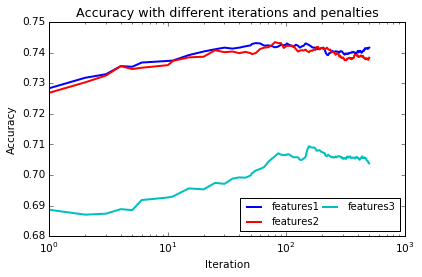

In [15]:
plt.plot(bt1['X1'], bt1['X5'],color="b", linestyle="-", label='features1', linewidth=2)
plt.plot(bt2['X1'], bt2['X5'],color="r", linestyle="-", label='features2', linewidth=2)
plt.plot(bt3['X1'], bt3['X5'],color="c", linestyle="-", label='features3', linewidth=2)
plt.legend(loc='lower right', ncol=2, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.rcParams.update({'font.size': 10.5})
plt.tight_layout()

In [16]:
lr_model1 = graphlab.logistic_classifier.create(train_data, target='label',\
                                            features=features1, validation_set=validation_data, max_iterations=100)

WARNING: Detected extremely low variance for feature(s) 'parser_tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 28020

Number of classes           : 3

Number of feature columns   : 7

Number of unpacked features : 13956

Number of coefficients    : 27914

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000036  | 0.127007     | 0.744397          | 0.680267            |

| 2         | 5        | 1.000000  | 0.566619     | 0.800892          | 0.696270            |

| 3         | 6        | 1.000000  | 0.951227     | 0.814561          | 0.665854            |

| 4         | 7        | 1.000000  | 1.377833     | 0.837901          | 0.696164            |

| 5         | 8        | 1.000000  | 1.804043     | 0.840221          | 0.696164            |

| 6         | 9        | 1.000000  | 2.234658     | 0.845896          | 0.694256            |

| 10        | 13       | 1.000000  | 3.999509     | 0.854069          | 0.687368            |

| 11        | 14       | 1.000000  | 4.432913     | 0.854782          | 0.686414            |

| 15        | 18       | 1.000000  | 6.095352     | 0.859814          | 0.684506            |

| 20        | 23       | 1.000000  | 8.189187     | 0.860885          | 0.686414            |

| 25        | 28       | 1.000000  | 10.186029    | 0.863383          | 0.685354            |

| 30        | 33       | 1.000000  | 12.261079    | 0.862705          | 0.686202            |

| 35        | 38       | 1.000000  | 14.297316    | 0.863919          | 0.687156            |

| 40        | 43       | 1.000000  | 16.739343    | 0.864597          | 0.689169            |

| 45        | 48       | 1.000000  | 19.184185    | 0.865132          | 0.686414            |

| 50        | 53       | 1.000000  | 21.194628    | 0.865418          | 0.686626            |

| 51        | 54       | 1.000000  | 21.584628    | 0.865168          | 0.685990            |

| 55        | 58       | 1.000000  | 23.308270    | 0.865703          | 0.687156            |

| 60        | 63       | 1.000000  | 25.357494    | 0.866096          | 0.688427            |

| 65        | 68       | 1.000000  | 27.496147    | 0.865168          | 0.688321            |

| 70        | 73       | 1.000000  | 29.648270    | 0.864989          | 0.687050            |

| 75        | 78       | 1.000000  | 31.726979    | 0.865168          | 0.686838            |

| 80        | 83       | 1.000000  | 33.708204    | 0.865418          | 0.687050            |

| 85        | 88       | 1.000000  | 35.770826    | 0.865917          | 0.686944            |

| 90        | 93       | 1.000000  | 37.711252    | 0.865632          | 0.687262            |

| 95        | 98       | 1.000000  | 39.588061    | 0.865525          | 0.686944            |

| 100       | 103      | 1.000000  | 41.486678    | 0.866381          | 0.685672            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [17]:
lr_model2 = graphlab.logistic_classifier.create(train_data, target='label',\
                                            features=features2, validation_set=validation_data, max_iterations=100)

Logistic regression:

--------------------------------------------------------

Number of examples          : 28020

Number of classes           : 3

Number of feature columns   : 6

Number of unpacked features : 13942

Number of coefficients    : 27886

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000036  | 0.072004     | 0.753533          | 0.680691            |

| 2         | 5        | 1.000000  | 0.551627     | 0.802427          | 0.695634            |

| 3         | 6        | 1.000000  | 0.951442     | 0.821734          | 0.678571            |

| 4         | 7        | 1.000000  | 1.356655     | 0.836188          | 0.693726            |

| 5         | 8        | 1.000000  | 1.783671     | 0.840435          | 0.695952            |

| 6         | 9        | 1.000000  | 2.192681     | 0.840935          | 0.680691            |

| 10        | 13       | 1.000000  | 3.786518     | 0.854675          | 0.688745            |

| 11        | 14       | 1.000000  | 4.142521     | 0.855103          | 0.684612            |

| 15        | 18       | 1.000000  | 5.740763     | 0.859386          | 0.684930            |

| 20        | 23       | 1.000000  | 7.701405     | 0.860707          | 0.683128            |

| 25        | 28       | 1.000000  | 9.973281     | 0.861849          | 0.683552            |

| 30        | 33       | 1.000000  | 12.344378    | 0.861599          | 0.681115            |

| 35        | 38       | 1.000000  | 14.694240    | 0.864311          | 0.683234            |

| 40        | 43       | 1.000000  | 16.619260    | 0.863383          | 0.685566            |

| 45        | 48       | 1.000000  | 18.529269    | 0.865382          | 0.684400            |

| 50        | 53       | 1.000000  | 20.437477    | 0.863597          | 0.685354            |

| 51        | 54       | 1.000000  | 20.827478    | 0.865096          | 0.685460            |

| 55        | 58       | 1.000000  | 22.467490    | 0.865132          | 0.684188            |

| 60        | 63       | 1.000000  | 24.403100    | 0.864704          | 0.683764            |

| 65        | 68       | 1.000000  | 27.044449    | 0.865882          | 0.684294            |

| 70        | 73       | 1.000000  | 29.428586    | 0.866024          | 0.684082            |

| 75        | 78       | 1.000000  | 31.910728    | 0.864811          | 0.680691            |

| 80        | 83       | 1.000000  | 34.373869    | 0.864775          | 0.681009            |

| 85        | 88       | 1.000000  | 36.496990    | 0.865310          | 0.683658            |

| 90        | 93       | 1.000000  | 38.389098    | 0.864632          | 0.682281            |

| 95        | 98       | 1.000000  | 40.323209    | 0.864882          | 0.683552            |

| 100       | 103      | 1.000000  | 42.225318    | 0.864918          | 0.683658            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [18]:
lr_model3 = graphlab.logistic_classifier.create(train_data, target='label',\
                                            features=features3, validation_set=validation_data, max_iterations=100)

Logistic regression:

--------------------------------------------------------

Number of examples          : 28020

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 13911

Number of coefficients    : 27824

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000036  | 0.061004     | 0.807637          | 0.687156            |

| 2         | 5        | 1.000000  | 0.516030     | 0.813133          | 0.698177            |

| 3         | 6        | 1.000000  | 0.899052     | 0.827837          | 0.685460            |

| 4         | 7        | 1.000000  | 1.302075     | 0.836652          | 0.687050            |

| 5         | 8        | 1.000000  | 1.695097     | 0.841113          | 0.689487            |

| 6         | 9        | 1.000000  | 2.077119     | 0.846288          | 0.686626            |

| 10        | 13       | 1.000000  | 3.642209     | 0.851499          | 0.683870            |

| 11        | 14       | 1.000000  | 3.994229     | 0.852213          | 0.679949            |

| 15        | 18       | 1.000000  | 5.507315     | 0.854675          | 0.676028            |

| 20        | 23       | 1.000000  | 7.326419     | 0.855353          | 0.676770            |

| 25        | 28       | 1.000000  | 9.132523     | 0.855782          | 0.674756            |

| 30        | 33       | 1.000000  | 10.944626    | 0.856031          | 0.676346            |

| 35        | 38       | 1.000000  | 12.791732    | 0.857495          | 0.673908            |

| 40        | 43       | 1.000000  | 14.640838    | 0.857709          | 0.673061            |

| 45        | 48       | 1.000000  | 16.457942    | 0.857780          | 0.674968            |

| 50        | 53       | 1.000000  | 18.276046    | 0.857566          | 0.674438            |

| 51        | 54       | 1.000000  | 18.631066    | 0.857637          | 0.673802            |

| 55        | 58       | 1.000000  | 20.142152    | 0.857923          | 0.673167            |

| 60        | 63       | 1.000000  | 21.955256    | 0.858530          | 0.673273            |

| 65        | 68       | 1.000000  | 23.828363    | 0.858351          | 0.672955            |

| 70        | 73       | 1.000000  | 25.708471    | 0.858565          | 0.648898            |

| 75        | 78       | 1.000000  | 27.617580    | 0.858387          | 0.647414            |

| 80        | 83       | 1.000000  | 29.464686    | 0.858744          | 0.648792            |

| 85        | 88       | 1.000000  | 31.322792    | 0.858601          | 0.646142            |

| 90        | 93       | 1.000000  | 33.134896    | 0.858387          | 0.648050            |

| 95        | 98       | 1.000000  | 34.964000    | 0.858351          | 0.647732            |

| 100       | 103      | 1.000000  | 36.803105    | 0.858672          | 0.648262            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [19]:
lr1 = graphlab.SFrame.read_csv('lr1.csv', delimiter=' ',header=False)
lr2 = graphlab.SFrame.read_csv('lr2.csv', delimiter=' ',header=False)
lr3 = graphlab.SFrame.read_csv('lr3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\lr1.csv

Parsing completed. Parsed 27 lines in 0.020001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\lr1.csv

Parsing completed. Parsed 27 lines in 0.016001 secs.

Finished parsing file E:\Python\2Graduation-Project\lr2.csv

Parsing completed. Parsed 27 lines in 0.036002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\lr2.csv

Parsing completed. Parsed 27 lines in 0.018001 secs.

Finished parsing file E:\Python\2Graduation-Project\lr3.csv

Parsing completed. Parsed 27 lines in 0.037003 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\lr3.csv

Parsing completed. Parsed 27 lines in 0.016001 secs.

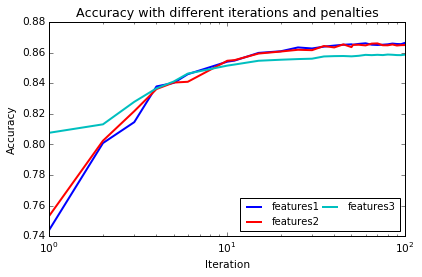

In [21]:
plt.plot(lr1['X1'], lr1['X5'],color="b", linestyle="-", label='features1', linewidth=2)
plt.plot(lr2['X1'], lr2['X5'],color="r", linestyle="-", label='features2', linewidth=2)
plt.plot(lr3['X1'], lr3['X5'],color="c", linestyle="-", label='features3', linewidth=2)
plt.legend(loc='lower right', ncol=2, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.rcParams.update({'font.size': 10.5})
plt.tight_layout()

In [19]:
bt1 = graphlab.SFrame.read_csv('bt1.csv', delimiter=' ',header=False)
bt2 = graphlab.SFrame.read_csv('bt2.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\bt1.csv

Parsing completed. Parsed 100 lines in 0.025001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 108 lines. Lines per second: 5142.61

Finished parsing file E:\Python\2Graduation-Project\bt1.csv

Parsing completed. Parsed 108 lines in 0.022001 secs.

Finished parsing file E:\Python\2Graduation-Project\bt2.csv

Parsing completed. Parsed 100 lines in 0.021001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\bt2.csv

Parsing completed. Parsed 108 lines in 0.019001 secs.

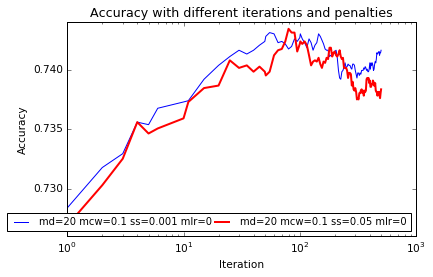

In [21]:
plt.plot(bt1['X1'], bt1['X5'],color="b", linestyle="-", label='md=20 mcw=0.1 ss=0.001 mlr=0', linewidth=1)
plt.plot(bt2['X1'], bt2['X5'],color="r", linestyle="-", label='md=20 mcw=0.1 ss=0.05 mlr=0', linewidth=2)
plt.legend(loc='lower right', ncol=2, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.rcParams.update({'font.size': 10.5})
plt.tight_layout()

In [72]:
boosted_tree.evaluate(validation_data)

{'accuracy': 0.7512363996043522,
 'auc': 0.8121019799671295,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Resource   |    Navigation   |   13  |
 |  Navigation  |   Information   |  102  |
 |  Navigation  |     Resource    |   5   |
 |   Resource   |     Resource    |  129  |
 |  Navigation  |    Navigation   |  149  |
 | Information  |     Resource    |   51  |
 | Information  |    Navigation   |   44  |
 | Information  |   Information   |  1241 |
 |   Resource   |   Information   |  288  |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.6336896869684362,
 'log_loss': 0.6517337819678953,
 'precision': 0.7271603873670626,
 'recall': 0.6036411551896207,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 

In [74]:
boosted_tree1.evaluate(validation_data)

{'accuracy': 0.6795252225519288,
 'auc': 0.736144833289381,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  Navigation  |    Navigation   |   56  |
 |   Resource   |     Resource    |   64  |
 |  Navigation  |     Resource    |   9   |
 |  Navigation  |   Information   |  191  |
 | Information  |     Resource    |   60  |
 | Information  |    Navigation   |   22  |
 | Information  |   Information   |  1254 |
 |   Resource   |   Information   |  363  |
 |   Resource   |    Navigation   |   3   |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.45246920030063187,
 'log_loss': 0.7508855664173383,
 'precision': 0.6220483676688717,
 'recall': 0.43540332126444786,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003


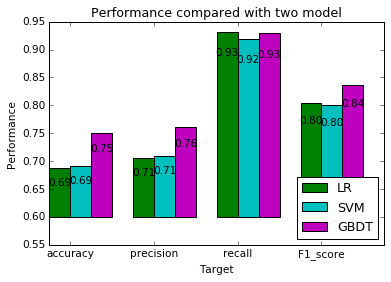

In [79]:
LR= (0.6875-0.6, 0.7061-0.6, 0.9324-0.6, 0.8036-0.6)
SVM= (0.6905487804878049-0.6, 0.7093225246091488-0.6, 0.9196696696696697-0.6, 0.8009153318077803-0.6)
GBDT= (0.7512363996043522-0.6, 0.76088-0.6, 0.92889-0.6, 0.8365-0.6)

ind = np.arange(4)
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR, width, 0.6, color='g')
rects2 = ax.bar(ind+width, SVM, width, 0.6,color='c')
rects3 = ax.bar(ind+2*width, GBDT, width, 0.6,color='m')

ax.set_xlabel('Target')
ax.set_ylabel('Performance')
ax.set_title('Performance compared with two model')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('accuracy', 'precision', 'recall', 'F1_score') )

ax.legend( (rects1[0], rects2[0], rects3[0]), ('LR', 'SVM', 'GBDT') ,loc='lower right')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()+0.6
        ax.text(rect.get_x()+rect.get_width()/2., 0.95*height, '%.2f'%float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.rcParams.update({'font.size': 10.5})

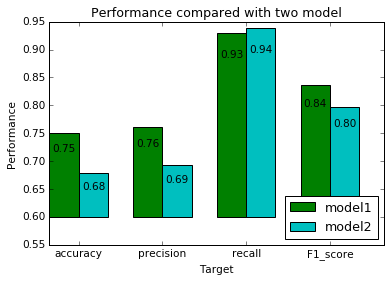

In [75]:
model1= (0.7512363996043522-0.6, 0.76088-0.6, 0.92889-0.6, 0.8365-0.6)
model2= (0.6795252225519288-0.6, 0.69358-0.6, 0.9386-0.6, 0.7977-0.6)

ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, model1, width, 0.6, color='g')
rects2 = ax.bar(ind+width, model2, width, 0.6,color='c')

ax.set_xlabel('Target')
ax.set_ylabel('Performance')
ax.set_title('Performance compared with two model')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('accuracy', 'precision', 'recall', 'F1_score') )

ax.legend( (rects1[0], rects2[0]), ('model1', 'model2') ,loc='lower right')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()+0.6
        ax.text(rect.get_x()+rect.get_width()/2., 0.95*height, '%.2f'%float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.rcParams.update({'font.size': 10.5})

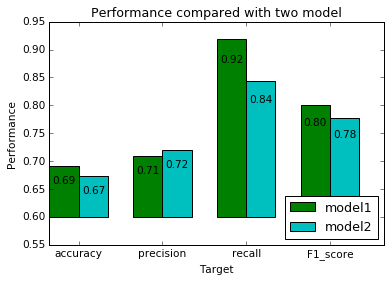

In [59]:
model1= (0.6905487804878049-0.6, 0.7093225246091488-0.6, 0.9196696696696697-0.6, 0.8009153318077803-0.6)
model2= (0.6727642276422764-0.6, 0.7205128205128205-0.6, 0.8438438438438438-0.6, 0.7773167358229599-0.6)

ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, model1, width, 0.6, color='g')
rects2 = ax.bar(ind+width, model2, width, 0.6,color='c')

ax.set_xlabel('Target')
ax.set_ylabel('Performance')
ax.set_title('Performance compared with two model')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('accuracy', 'precision', 'recall', 'F1_score') )

ax.legend( (rects1[0], rects2[0]), ('model1', 'model2') ,loc='lower right')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()+0.6
        ax.text(rect.get_x()+rect.get_width()/2., 0.95*height, '%.2f'%float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.rcParams.update({'font.size': 10.5})

In [59]:
ss12 = graphlab.SFrame.read_csv('ss12.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss12.csv

Parsing completed. Parsed 100 lines in 0.020001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss12.csv

Parsing completed. Parsed 211 lines in 0.018001 secs.

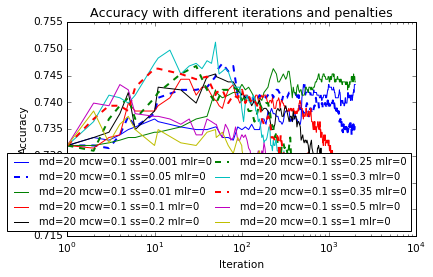

In [60]:
plt.plot(ss1['X1'], ss1['X5'],color="b", linestyle="-", label='md=20 mcw=0.1 ss=0.001 mlr=0', linewidth=1)
plt.plot(ss8['X1'], ss8['X5'],color="b", linestyle="--", label='md=20 mcw=0.1 ss=0.05 mlr=0', linewidth=2)
plt.plot(ss2['X1'], ss2['X5'],color="g", linestyle="-", label='md=20 mcw=0.1 ss=0.01 mlr=0', linewidth=1)
plt.plot(ss3['X1'], ss3['X5'],color="r", linestyle="-", label='md=20 mcw=0.1 ss=0.1 mlr=0', linewidth=1)
plt.plot(ss7['X1'], ss7['X5'],color="k", linestyle="-", label='md=20 mcw=0.1 ss=0.2 mlr=0', linewidth=1)
plt.plot(ss11['X1'], ss11['X5'],color="g", linestyle="--", label='md=20 mcw=0.1 ss=0.25 mlr=0', linewidth=2)
plt.plot(ss4['X1'], ss4['X5'],color="c", linestyle="-", label='md=20 mcw=0.1 ss=0.3 mlr=0', linewidth=1)
plt.plot(ss12['X1'], ss12['X5'],color="r", linestyle="--", label='md=20 mcw=0.1 ss=0.35 mlr=0', linewidth=2)
plt.plot(ss5['X1'], ss5['X5'],color="m", linestyle="-", label='md=20 mcw=0.1 ss=0.5 mlr=0', linewidth=1)
plt.plot(ss6['X1'], ss6['X5'],color="y", linestyle="-", label='md=20 mcw=0.1 ss=1 mlr=0', linewidth=1)
plt.legend(loc='lower right', ncol=2, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.rcParams.update({'font.size': 10.5})
plt.tight_layout()

In [56]:
ss11 = graphlab.SFrame.read_csv('ss11.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss11.csv

Parsing completed. Parsed 100 lines in 0.017001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss11.csv

Parsing completed. Parsed 211 lines in 0.014 secs.

In [51]:
ss10 = graphlab.SFrame.read_csv('ss10.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss10.csv

Parsing completed. Parsed 100 lines in 0.017001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss10.csv

Parsing completed. Parsed 211 lines in 0.015001 secs.

In [48]:
ss9 = graphlab.SFrame.read_csv('ss9.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss9.csv

Parsing completed. Parsed 100 lines in 0.021001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss9.csv

Parsing completed. Parsed 211 lines in 0.022001 secs.

In [45]:
ss8 = graphlab.SFrame.read_csv('ss8.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss8.csv

Parsing completed. Parsed 100 lines in 0.023002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss8.csv

Parsing completed. Parsed 211 lines in 0.022001 secs.

In [42]:
ss7 = graphlab.SFrame.read_csv('ss7.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss7.csv

Parsing completed. Parsed 100 lines in 0.018001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss7.csv

Parsing completed. Parsed 211 lines in 0.020001 secs.

In [39]:
ss6 = graphlab.SFrame.read_csv('ss6.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss6.csv

Parsing completed. Parsed 100 lines in 0.033002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss6.csv

Parsing completed. Parsed 211 lines in 0.021001 secs.

In [36]:
ss5 = graphlab.SFrame.read_csv('ss5.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss5.csv

Parsing completed. Parsed 100 lines in 0.105006 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss5.csv

Parsing completed. Parsed 410 lines in 0.018001 secs.

In [33]:
ss4 = graphlab.SFrame.read_csv('ss4.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss4.csv

Parsing completed. Parsed 100 lines in 0.030002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss4.csv

Parsing completed. Parsed 410 lines in 0.027002 secs.

In [30]:
ss3 = graphlab.SFrame.read_csv('ss3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss3.csv

Parsing completed. Parsed 100 lines in 0.030001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss3.csv

Parsing completed. Parsed 410 lines in 0.044002 secs.

In [27]:
ss2 = graphlab.SFrame.read_csv('ss2.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss2.csv

Parsing completed. Parsed 100 lines in 0.035002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss2.csv

Parsing completed. Parsed 211 lines in 0.035002 secs.

In [24]:
ss1 = graphlab.SFrame.read_csv('ss1.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ss1.csv

Parsing completed. Parsed 100 lines in 0.0156 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ss1.csv

Parsing completed. Parsed 211 lines in 0.030002 secs.

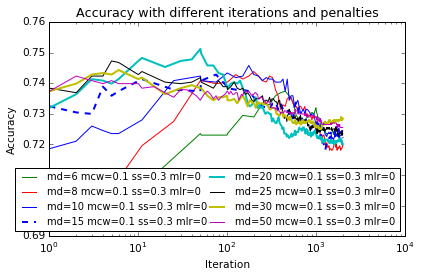

In [46]:
plt.plot(gbdt2['X1'], gbdt2['X5'],color="g", linestyle="-", label='md=6 mcw=0.1 ss=0.3 mlr=0', linewidth=1)
plt.plot(gbdt3['X1'], gbdt3['X5'],color="r", linestyle="-", label='md=8 mcw=0.1 ss=0.3 mlr=0', linewidth=1)
plt.plot(gbdt1['X1'], gbdt1['X5'],color="b", linestyle="-", label='md=10 mcw=0.1 ss=0.3 mlr=0', linewidth=1)
plt.plot(gbdt9['X1'], gbdt9['X5'],color="b", linestyle="--", label='md=15 mcw=0.1 ss=0.3 mlr=0', linewidth=2)
plt.plot(gbdt4['X1'], gbdt4['X5'],color="c", linestyle="-", label='md=20 mcw=0.1 ss=0.3 mlr=0', linewidth=2)
plt.plot(gbdt8['X1'], gbdt8['X5'],color="k", linestyle="-", label='md=25 mcw=0.1 ss=0.3 mlr=0', linewidth=1)
plt.plot(gbdt7['X1'], gbdt7['X5'],color="y", linestyle="-", label='md=30 mcw=0.1 ss=0.3 mlr=0', linewidth=2)
plt.plot(gbdt5['X1'], gbdt5['X5'],color="m", linestyle="-", label='md=50 mcw=0.1 ss=0.3 mlr=0', linewidth=1)
plt.legend(loc='lower right', ncol=2, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.rcParams.update({'font.size': 10.5})
plt.tight_layout()

In [42]:
gbdt9 = graphlab.SFrame.read_csv('gbdt9.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt9.csv

Parsing completed. Parsed 91 lines in 0.033002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt9.csv

Parsing completed. Parsed 91 lines in 0.015001 secs.

In [37]:
gbdt8 = graphlab.SFrame.read_csv('gbdt8.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt8.csv

Parsing completed. Parsed 100 lines in 0.014001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt8.csv

Parsing completed. Parsed 211 lines in 0.019001 secs.

In [33]:
gbdt7 = graphlab.SFrame.read_csv('gbdt7.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt7.csv

Parsing completed. Parsed 100 lines in 0.0156 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt7.csv

Parsing completed. Parsed 211 lines in 0.021001 secs.

In [27]:
gbdt6 = graphlab.SFrame.read_csv('gbdt6.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt6.csv

Parsing completed. Parsed 100 lines in 0.0276 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt6.csv

Parsing completed. Parsed 211 lines in 0.014001 secs.

In [24]:
gbdt5 = graphlab.SFrame.read_csv('gbdt5.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt5.csv

Parsing completed. Parsed 100 lines in 0 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt5.csv

Parsing completed. Parsed 410 lines in 0.015001 secs.

In [20]:
gbdt4 = graphlab.SFrame.read_csv('gbdt4.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt4.csv

Parsing completed. Parsed 100 lines in 0.023601 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt4.csv

Parsing completed. Parsed 211 lines in 0.022001 secs.

In [16]:
gbdt3 = graphlab.SFrame.read_csv('gbdt3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt3.csv

Parsing completed. Parsed 91 lines in 0.018001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt3.csv

Parsing completed. Parsed 91 lines in 0.016 secs.

In [13]:
gbdt2 = graphlab.SFrame.read_csv('gbdt2.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt2.csv

Parsing completed. Parsed 51 lines in 0.036601 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt2.csv

Parsing completed. Parsed 51 lines in 0.022001 secs.

In [9]:
gbdt1 = graphlab.SFrame.read_csv('gbdt1.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\gbdt1.csv

Parsing completed. Parsed 91 lines in 0.0156 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\gbdt1.csv

Parsing completed. Parsed 91 lines in 0.020001 secs.

In [74]:
boosted_tree.evaluate(test_data)

{'accuracy': 0.695630081300813,
 'auc': 0.7867456137910166,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 | Information  |     Resource    |  187  |
 | Information  |    Navigation   |   52  |
 |  Navigation  |   Information   |   84  |
 |  Navigation  |    Navigation   |  130  |
 |   Resource   |    Navigation   |   18  |
 |  Navigation  |     Resource    |   7   |
 |   Resource   |     Resource    |  146  |
 |   Resource   |   Information   |  251  |
 | Information  |   Information   |  1093 |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.5987870498481025,
 'log_loss': 1.220024188097005,
 'precision': 0.6149393090569562,
 'recall': 0.5868710312012935,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 
 

In [54]:
svm_model1 = graphlab.svm_classifier.create(train_data, target='label.Information',\
                                            features=features1, validation_set=validation_data,\
                                            penalty=1,max_iterations=2)

WARNING: Detected extremely low variance for feature(s) 'parsers_tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

SVM:

--------------------------------------------------------

Number of examples          : 6010

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 4319

Number of coefficients    : 4320

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000166  | 0.030002     | 0.728453          | 0.678536            |

| 2         | 5        | 1.000000  | 0.059004     | 0.809817          | 0.693373            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [55]:
svm_model2 = graphlab.svm_classifier.create(train_data, target='label.Information',\
                                            features=features2, validation_set=validation_data,\
                                            penalty=1,max_iterations=2)

SVM:

--------------------------------------------------------

Number of examples          : 6010

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 4276

Number of coefficients    : 4277

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000166  | 0.012000     | 0.811314          | 0.684965            |

| 2         | 5        | 1.000000  | 0.023001     | 0.847421          | 0.676558            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [57]:
svm_model2.evaluate(test_data)

{'accuracy': 0.6727642276422764, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  436  |
 |      1       |        1        |  1124 |
 |      0       |        0        |  200  |
 |      1       |        0        |  208  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.7773167358229599, 'precision': 0.7205128205128205, 'recall': 0.8438438438438438}

In [51]:
svm9 = graphlab.SFrame.read_csv('svm9.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm9.csv

Parsing completed. Parsed 83 lines in 0.014001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm9.csv

Parsing completed. Parsed 83 lines in 0.014 secs.

In [47]:
svm8 = graphlab.SFrame.read_csv('svm8.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm8.csv

Parsing completed. Parsed 91 lines in 0.021001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm8.csv

Parsing completed. Parsed 91 lines in 0.019002 secs.

In [44]:
svm7 = graphlab.SFrame.read_csv('svm7.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm7.csv

Parsing completed. Parsed 77 lines in 0.020002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm7.csv

Parsing completed. Parsed 77 lines in 0.017001 secs.

In [39]:
svm6 = graphlab.SFrame.read_csv('svm6.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm6.csv

Parsing completed. Parsed 84 lines in 0.030002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm6.csv

Parsing completed. Parsed 84 lines in 0.015 secs.

In [35]:
svm5 = graphlab.SFrame.read_csv('svm5.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm5.csv

Parsing completed. Parsed 100 lines in 0.021001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm5.csv

Parsing completed. Parsed 212 lines in 0.015 secs.

In [31]:
svm4 = graphlab.SFrame.read_csv('svm4.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm4.csv

Parsing completed. Parsed 100 lines in 0.022001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm4.csv

Parsing completed. Parsed 103 lines in 0.017001 secs.

In [27]:
svm3 = graphlab.SFrame.read_csv('svm3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm3.csv

Parsing completed. Parsed 48 lines in 0.030002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm3.csv

Parsing completed. Parsed 48 lines in 0.020001 secs.

In [24]:
svm2 = graphlab.SFrame.read_csv('svm2.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm2.csv

Parsing completed. Parsed 26 lines in 0.017001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm2.csv

Parsing completed. Parsed 26 lines in 0.016001 secs.

In [21]:
svm1 = graphlab.SFrame.read_csv('svm1.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\svm1.csv

Parsing completed. Parsed 15 lines in 0.015 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\svm1.csv

Parsing completed. Parsed 15 lines in 0.014001 secs.

In [10]:
logistic_model_1 = graphlab.logistic_classifier.create(train_data, target='label', \
                                                       features=features1, validation_set=validation_data, \
                                                       max_iterations=2, l2_penalty=1.65, l1_penalty=10)

WARNING: Detected extremely low variance for feature(s) 'parsers_tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 6010

Number of classes           : 3

Number of feature columns   : 7

Number of unpacked features : 4319

Number of coefficients    : 8640

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Tuning step size. First iteration could take longer than subsequent iterations.

| 1         | 2        | 0.000134  | 0.233013     | 0.756073          | 0.671118            |

| 2         | 3        | 0.000134  | 0.309017     | 0.799834          | 0.687933            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [11]:
logistic_model_2 = graphlab.logistic_classifier.create(train_data, target='label', \
                                                       features=features2, validation_set=validation_data, \
                                                       max_iterations=2, l2_penalty=1.65, l1_penalty=10)

Logistic regression:

--------------------------------------------------------

Number of examples          : 6010

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 4276

Number of coefficients    : 8554

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Tuning step size. First iteration could take longer than subsequent iterations.

| 1         | 2        | 0.000301  | 0.094006     | 0.822296          | 0.658259            |

| 2         | 3        | 0.000301  | 0.149009     | 0.831281          | 0.667656            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [13]:
logistic_model_2.evaluate(test_data)

{'accuracy': 0.6646341463414634,
 'auc': 0.721627728572038,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Resource   |    Navigation   |   7   |
 | Information  |    Navigation   |   42  |
 | Information  |     Resource    |  127  |
 |  Navigation  |    Navigation   |   66  |
 |  Navigation  |   Information   |  150  |
 |  Navigation  |     Resource    |   5   |
 |   Resource   |     Resource    |   79  |
 |   Resource   |   Information   |  329  |
 | Information  |   Information   |  1163 |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.4757883143846906,
 'log_loss': 0.7836578003372342,
 'precision': 0.5522010695444861,
 'recall': 0.45404236761430244,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 

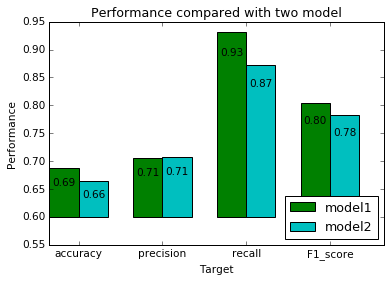

In [18]:
import numpy as np
model1= (0.6875-0.6, 0.7061-0.6, 0.9324-0.6, 0.8036-0.6)
model2= (0.6646341463414634-0.6, 0.7082-0.6, 0.8731-0.6, 0.7820-0.6)

ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, model1, width, 0.6, color='g')
rects2 = ax.bar(ind+width, model2, width, 0.6,color='c')

ax.set_xlabel('Target')
ax.set_ylabel('Performance')
ax.set_title('Performance compared with two model')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('accuracy', 'precision', 'recall', 'F1_score') )

ax.legend( (rects1[0], rects2[0]), ('model1', 'model2') ,loc='lower right')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()+0.6
        ax.text(rect.get_x()+rect.get_width()/2., 0.95*height, '%.2f'%float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.rcParams.update({'font.size': 10.5})

In [81]:
ltwo16 = graphlab.SFrame.read_csv('ltwo16.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo16.csv

Parsing completed. Parsed 10 lines in 0.028001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo16.csv

Parsing completed. Parsed 10 lines in 0.026001 secs.

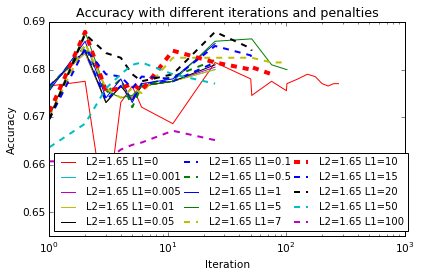

In [84]:
plt.plot(ltwo3['X1'], ltwo3['X6'],color="r", linestyle="-", label='L2=1.65 L1=0')
plt.plot(ltwo4['X1'], ltwo4['X6'],color="c", linestyle="-", label='L2=1.65 L1=0.001')
plt.plot(ltwo5['X1'], ltwo5['X6'],color="m", linestyle="-", label='L2=1.65 L1=0.005')
plt.plot(ltwo6['X1'], ltwo6['X6'],color="y", linestyle="-", label='L2=1.65 L1=0.01')
plt.plot(ltwo7['X1'], ltwo7['X6'],color="k", linestyle="-", label='L2=1.65 L1=0.05')
plt.plot(ltwo8['X1'], ltwo8['X6'],color="b", linestyle="--", label='L2=1.65 L1=0.1', linewidth=2)
plt.plot(ltwo9['X1'], ltwo9['X6'],color="g", linestyle="--", label='L2=1.65 L1=0.5', linewidth=2)
plt.plot(ltwo1['X1'], ltwo1['X6'],color="b", linestyle="-", label='L2=1.65 L1=1')
plt.plot(ltwo2['X1'], ltwo2['X6'],color="g", linestyle="-", label='L2=1.65 L1=5')
plt.plot(ltwo14['X1'], ltwo14['X6'],color="y", linestyle="--", label='L2=1.65 L1=7', linewidth=2)
plt.plot(ltwo10['X1'], ltwo10['X6'],color="r", linestyle="--", label='L2=1.65 L1=10', linewidth=4)
plt.plot(ltwo16['X1'], ltwo16['X6'],color="b", linestyle="--", label='L2=1.65 L1=15', linewidth=2)
plt.plot(ltwo15['X1'], ltwo15['X6'],color="k", linestyle="--", label='L2=1.65 L1=20', linewidth=2)
plt.plot(ltwo11['X1'], ltwo11['X6'],color="c", linestyle="--", label='L2=1.65 L1=50', linewidth=2)
plt.plot(ltwo12['X1'], ltwo12['X6'],color="m", linestyle="--", label='L2=1.65 L1=100', linewidth=2)
plt.legend(loc='best', ncol=3, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')

plt.tight_layout()

In [75]:
ltwo14 = graphlab.SFrame.read_csv('ltwo14.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo14.csv

Parsing completed. Parsed 13 lines in 0.022002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo14.csv

Parsing completed. Parsed 13 lines in 0.015001 secs.

In [71]:
ltwo13 = graphlab.SFrame.read_csv('ltwo13.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo13.csv

Parsing completed. Parsed 6 lines in 0.026001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo13.csv

Parsing completed. Parsed 6 lines in 0.015001 secs.

In [68]:
ltwo12 = graphlab.SFrame.read_csv('ltwo12.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo12.csv

Parsing completed. Parsed 8 lines in 0.020001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo12.csv

Parsing completed. Parsed 8 lines in 0.025001 secs.

In [65]:
ltwo11 = graphlab.SFrame.read_csv('ltwo11.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo11.csv

Parsing completed. Parsed 8 lines in 0.026002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo11.csv

Parsing completed. Parsed 8 lines in 0.015001 secs.

In [62]:
ltwo10 = graphlab.SFrame.read_csv('ltwo10.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo10.csv

Parsing completed. Parsed 11 lines in 0.019001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo10.csv

Parsing completed. Parsed 11 lines in 0.017001 secs.

In [59]:
ltwo9 = graphlab.SFrame.read_csv('ltwo9.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo9.csv

Parsing completed. Parsed 8 lines in 0.022002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo9.csv

Parsing completed. Parsed 8 lines in 0.026002 secs.

In [55]:
ltwo8 = graphlab.SFrame.read_csv('ltwo8.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo8.csv

Parsing completed. Parsed 8 lines in 0.020001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo8.csv

Parsing completed. Parsed 8 lines in 0.030001 secs.

In [52]:
ltwo7 = graphlab.SFrame.read_csv('ltwo7.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo7.csv

Parsing completed. Parsed 8 lines in 0.017001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo7.csv

Parsing completed. Parsed 8 lines in 0.045003 secs.

In [49]:
ltwo6 = graphlab.SFrame.read_csv('ltwo6.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo6.csv

Parsing completed. Parsed 8 lines in 0.017001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo6.csv

Parsing completed. Parsed 8 lines in 0.017001 secs.

In [46]:
ltwo5 = graphlab.SFrame.read_csv('ltwo5.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo5.csv

Parsing completed. Parsed 8 lines in 0.016001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo5.csv

Parsing completed. Parsed 8 lines in 0.022002 secs.

In [43]:
ltwo4 = graphlab.SFrame.read_csv('ltwo4.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo4.csv

Parsing completed. Parsed 8 lines in 0.030002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo4.csv

Parsing completed. Parsed 8 lines in 0.020001 secs.

In [40]:
ltwo3 = graphlab.SFrame.read_csv('ltwo3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo3.csv

Parsing completed. Parsed 20 lines in 0.030002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo3.csv

Parsing completed. Parsed 20 lines in 0.018001 secs.

In [37]:
ltwo2 = graphlab.SFrame.read_csv('ltwo2.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo2.csv

Parsing completed. Parsed 13 lines in 0.022001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo2.csv

Parsing completed. Parsed 13 lines in 0.019001 secs.

In [34]:
ltwo1 = graphlab.SFrame.read_csv('ltwo1.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\ltwo1.csv

Parsing completed. Parsed 8 lines in 0.025002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\ltwo1.csv

Parsing completed. Parsed 8 lines in 0.021002 secs.

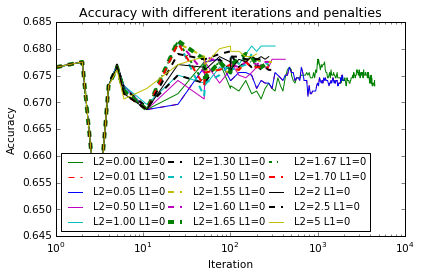

In [85]:
plt.plot(text['X1'], text['X6'],color="green", linestyle="-", label='L2=0.00 L1=0') 
plt.plot(text2['X1'], text2['X6'],color="red", linestyle="--", label='L2=0.01 L1=0') 
plt.plot(text1['X1'], text1['X6'],color="blue", linestyle="-", label='L2=0.05 L1=0')
plt.plot(text4['X1'], text4['X6'],color="m", linestyle="-", label='L2=0.50 L1=0') 
plt.plot(text3['X1'], text3['X6'],color="c", linestyle="-", label='L2=1.00 L1=0')
plt.plot(text10['X1'], text10['X6'],color="k", linestyle="--", label='L2=1.30 L1=0', linewidth=2)
plt.plot(text7['X1'], text7['X6'],color="c", linestyle="--", label='L2=1.50 L1=0', linewidth=2)
plt.plot(text12['X1'], text12['X6'],color="y", linestyle="--", label='L2=1.55 L1=0', linewidth=2)
plt.plot(text11['X1'], text11['X6'],color="m", linestyle="--", label='L2=1.60 L1=0', linewidth=2)
plt.plot(text13['X1'], text13['X6'],color="g", linestyle="--", label='L2=1.65 L1=0', linewidth=4)
plt.plot(text14['X1'], text14['X6'],color="g", linestyle="-.", label='L2=1.67 L1=0', linewidth=2)
plt.plot(text9['X1'], text9['X6'],color="r", linestyle="--", label='L2=1.70 L1=0', linewidth=2)
plt.plot(text6['X1'], text6['X6'],color="k", linestyle="-", label='L2=2 L1=0')
plt.plot(text8['X1'], text8['X6'],color="k", linestyle="--", label='L2=2.5 L1=0', linewidth=2)
plt.plot(text5['X1'], text5['X6'],color="y", linestyle="-", label='L2=5 L1=0')
plt.legend(loc='best', ncol=3, columnspacing=0.001, prop={'size':10}) 
plt.title('Accuracy with different iterations and penalties')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.rcParams.update({'font.size': 10.5})
plt.tight_layout()

In [8]:
text14 = graphlab.SFrame.read_csv('text14.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text14.csv

Parsing completed. Parsed 20 lines in 0.025002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text14.csv

Parsing completed. Parsed 20 lines in 0.020002 secs.

In [9]:
text13 = graphlab.SFrame.read_csv('text13.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text13.csv

Parsing completed. Parsed 20 lines in 0.029002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text13.csv

Parsing completed. Parsed 20 lines in 0.025001 secs.

In [10]:
text12 = graphlab.SFrame.read_csv('text12.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text12.csv

Parsing completed. Parsed 21 lines in 0.020001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text12.csv

Parsing completed. Parsed 21 lines in 0.027001 secs.

In [11]:
text11 = graphlab.SFrame.read_csv('text11.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text11.csv

Parsing completed. Parsed 20 lines in 0.021001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text11.csv

Parsing completed. Parsed 20 lines in 0.070004 secs.

In [12]:
text10 = graphlab.SFrame.read_csv('text10.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text10.csv

Parsing completed. Parsed 21 lines in 0.024002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text10.csv

Parsing completed. Parsed 21 lines in 0.026001 secs.

In [13]:
text9 = graphlab.SFrame.read_csv('text9.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text9.csv

Parsing completed. Parsed 20 lines in 0.023002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text9.csv

Parsing completed. Parsed 20 lines in 0.026002 secs.

In [14]:
text8 = graphlab.SFrame.read_csv('text8.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text8.csv

Parsing completed. Parsed 19 lines in 0.021001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text8.csv

Parsing completed. Parsed 19 lines in 0.020001 secs.

In [15]:
text1 = graphlab.SFrame.read_csv('text1.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text1.csv

Parsing completed. Parsed 91 lines in 0.014001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text1.csv

Parsing completed. Parsed 91 lines in 0.028002 secs.

In [16]:
text2 = graphlab.SFrame.read_csv('text2.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text2.csv

Parsing completed. Parsed 91 lines in 0.019001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text2.csv

Parsing completed. Parsed 91 lines in 0.037002 secs.

In [17]:
text = graphlab.SFrame.read_csv('text.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text.csv

Parsing completed. Parsed 100 lines in 0.025001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text.csv

Parsing completed. Parsed 192 lines in 0.025001 secs.

In [18]:
text3 = graphlab.SFrame.read_csv('text3.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text3.csv

Parsing completed. Parsed 22 lines in 0.017001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text3.csv

Parsing completed. Parsed 22 lines in 0.029002 secs.

In [19]:
text4 = graphlab.SFrame.read_csv('text4.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text4.csv

Parsing completed. Parsed 26 lines in 0.018001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text4.csv

Parsing completed. Parsed 26 lines in 0.037003 secs.

In [20]:
text5 = graphlab.SFrame.read_csv('text5.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text5.csv

Parsing completed. Parsed 17 lines in 0.019001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text5.csv

Parsing completed. Parsed 17 lines in 0.030002 secs.

In [21]:
text6 = graphlab.SFrame.read_csv('text6.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text6.csv

Parsing completed. Parsed 20 lines in 0.019001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text6.csv

Parsing completed. Parsed 20 lines in 0.076004 secs.

In [22]:
text7 = graphlab.SFrame.read_csv('text7.csv', delimiter=' ',header=False)

Finished parsing file E:\Python\2Graduation-Project\text7.csv

Parsing completed. Parsed 20 lines in 0.016001 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Python\2Graduation-Project\text7.csv

Parsing completed. Parsed 20 lines in 0.033002 secs.